In [1]:
!pip install --upgrade tensorflow

INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.


ERROR: Could not find a version that satisfies the requirement keras<2.16,>=2.15.0 (from tensorflow-intel) (from versions: none)
ERROR: No matching distribution found for keras<2.16,>=2.15.0


In [2]:
!pip install --upgrade keras

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

In [4]:
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

In [5]:
df=pd.read_csv(r'C:\\Users\\86130\\00.Project\\03.Datasets\\Resample Median data fill 15mins.csv')
print(df)#### Re-import the dataset. Import populates the complete dataset using median resampling

                   datatime  total power usage（kw）
0       2018-01-01 00:00:00            244033.7682
1       2018-01-01 00:15:00            232720.6402
2       2018-01-01 00:30:00            231685.6891
3       2018-01-01 00:45:00            227581.3317
4       2018-01-01 01:00:00            233482.4269
...                     ...                    ...
128539  2021-08-31 22:45:00            202409.1270
128540  2021-08-31 23:00:00            218576.4635
128541  2021-08-31 23:15:00            200112.5091
128542  2021-08-31 23:30:00            199865.5937
128543  2021-08-31 23:45:00            198483.5592

[128544 rows x 2 columns]


In [6]:
df.describe()

,total power usage（kw）
count,128544.000000
mean,213667.691568
std,45263.338113
min,3294.540900
25%,189800.956750
50%,209407.307500
75%,239062.749725
max,369600.468100


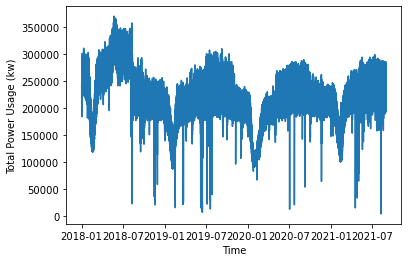

In [7]:
import matplotlib.pyplot as plt

df['datatime'] = pd.to_datetime(df['datatime'])
plt.plot(df['datatime'], df['total power usage（kw）'])
plt.xlabel('Time')
plt.ylabel('Total Power Usage (kw)')
plt.show()

C:\Users\86130\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86130\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


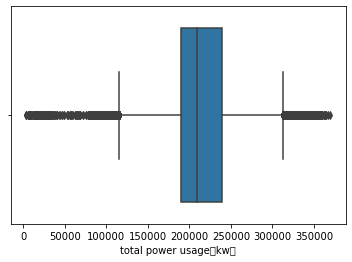

In [8]:
import seaborn as sns
sns.boxplot(x=df['total power usage（kw）'])
plt.show()

In [9]:
z_scores = (df['total power usage（kw）'] - df['total power usage（kw）'].mean()) / df['total power usage（kw）'].std()
outliers = z_scores.abs() > 3  
print(df[outliers])

                  datatime  total power usage（kw）
13484  2018-05-21 11:00:00            357240.3162
13488  2018-05-21 12:00:00            352868.3437
13492  2018-05-21 13:00:00            351089.1129
13496  2018-05-21 14:00:00            355503.3092
13500  2018-05-21 15:00:00            355824.1600
...                    ...                    ...
126367 2021-08-09 07:45:00              3294.5409
126368 2021-08-09 08:00:00              3655.8173
126369 2021-08-09 08:15:00              3497.2847
126370 2021-08-09 08:30:00             14913.9532
126371 2021-08-09 08:45:00             56443.8603

[333 rows x 2 columns]


In [10]:
##Outliers
median_val = df['total power usage（kw）'].median()
# Define functions to replace outliers by using median
def replace_outliers_with_median(data, threshold=3):
    outliers = np.abs(z_scores) > threshold
    data[outliers] = median_val
    return data
df['total power usage（kw）'] = replace_outliers_with_median(df['total power usage（kw）'])

C:\Users\86130\AppData\Local\Temp\ipykernel_2632\678368522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = median_val


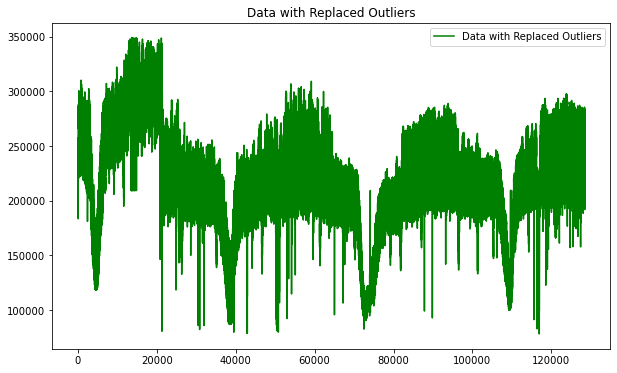

In [11]:
# Visualization of replaced data
plt.figure(figsize=(10, 6))
plt.plot(df['total power usage（kw）'], label='Data with Replaced Outliers', color='green')
plt.legend()
plt.title('Data with Replaced Outliers')
plt.show()

In [12]:
df.head()

,datatime,total power usage（kw）
0,2018-01-01 00:00:00,244033.7682
1,2018-01-01 00:15:00,232720.6402
2,2018-01-01 00:30:00,231685.6891
3,2018-01-01 00:45:00,227581.3317
4,2018-01-01 01:00:00,233482.4269


In [13]:
df.to_csv(r"C:\\Users\\86130\\00.Project\\03.Datasets\\After processing 15mins data-1126.csv",index=True,header=True) 

In [14]:
df['datatime'] = pd.to_datetime(df['datatime'])
df.set_index('datatime', inplace=True)
print(df)

                     total power usage（kw）
datatime                                  
2018-01-01 00:00:00            244033.7682
2018-01-01 00:15:00            232720.6402
2018-01-01 00:30:00            231685.6891
2018-01-01 00:45:00            227581.3317
2018-01-01 01:00:00            233482.4269
...                                    ...
2021-08-31 22:45:00            202409.1270
2021-08-31 23:00:00            218576.4635
2021-08-31 23:15:00            200112.5091
2021-08-31 23:30:00            199865.5937
2021-08-31 23:45:00            198483.5592

[128544 rows x 1 columns]


# Normalize Dataset

In [15]:
## 
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['total power usage（kw）']=scaler.fit_transform(df['total power usage（kw）'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(128544, 1)

C:\Users\86130\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86130\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


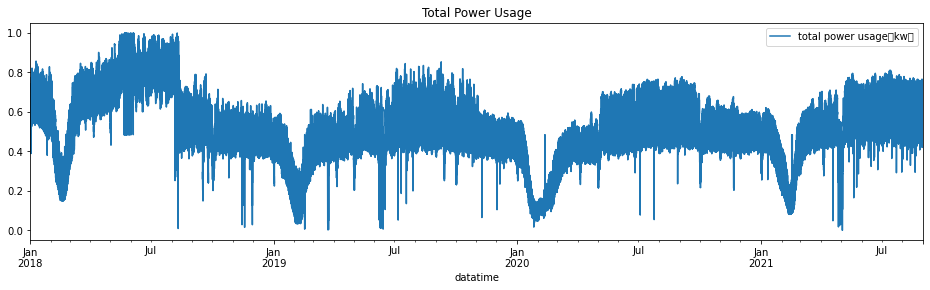

In [16]:
df_norm.plot(figsize=(16,4),legend=True)
plt.title('Total Power Usage')
plt.show()

# Create Train Test Data set

In [17]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 8544 days are going to be used in test
    X_test = X_train[120000:]             
    y_test = y_train[120000:]
    
    #2 first 120000 days are going to be used in training
    X_train = X_train[:120000]           
    y_train = y_train[:120000]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (120000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [18]:
# create train, test data
seq_len = 20  # choose sequence length

def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i - seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])

    # 1 last 8544 days are going to be used in test
    X_test = X_train[120000:]
    y_test = y_train[120000:]

    # 2 first 120000 days are going to be used in training
    X_train = X_train[:120000]
    y_train = y_train[:120000]

    # 3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # 4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (120000, seq_len, 1))

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120000, 20, 1)
y_train.shape =  (120000,)
X_test.shape =  (8524, 20, 1)
y_test.shape =  (8524,)


# Using RNN Model

In [19]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)             │ (None, 20, 40)                │       1,680 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 20, 40)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ simple_rnn_1 (SimpleRNN)           │ (None, 20, 40)                │       3,240 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 20, 40)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ simple_rnn_2 (SimpleRNN)           │ (None, 40)                    │       3,240 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 40)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 1)                     │          41 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 8,201 (32.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.optimizers import Adam
learning_rate = 0.0001  
# Compile the model with the Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [21]:
rnn_model.compile(optimizer=optimizer,loss="MSE")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)#### set epochs=10, batch_size=1000

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.3709
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1488
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0883
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0593
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0441
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0348
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0286
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0241
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0210
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0183


# Calculate R2 MAPE RMSE MAE MSE

In [22]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R2 Score of RNN model =  0.8999598476522547


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
RNNmape = np.mean(np.abs((y_test - rnn_predictions) / y_test)) * 100
RNNrmse = np.sqrt(np.mean((y_test - rnn_predictions)**2))

print("MAPE of RNN model =", RNNmape)
print("RMSE of RNN model =", RNNrmse)

MAPE of RNN model = 19.72609454699935
RMSE of RNN model = 0.13413591758982343


In [24]:
RNN_MAE = mean_absolute_error(y_test, rnn_predictions)
print("MAE of RNN model =:", RNN_MAE)

# Calculate Mean Squared Error (MSE)
RNN_MSE = mean_squared_error(y_test, rnn_predictions)
print("MSE of RNN model=:", RNN_MSE)


MAE of RNN model =: 0.023751791904322382
MSE of RNN model=: 0.000912308343840925


# Using RNN Model predicted VS actual Plot

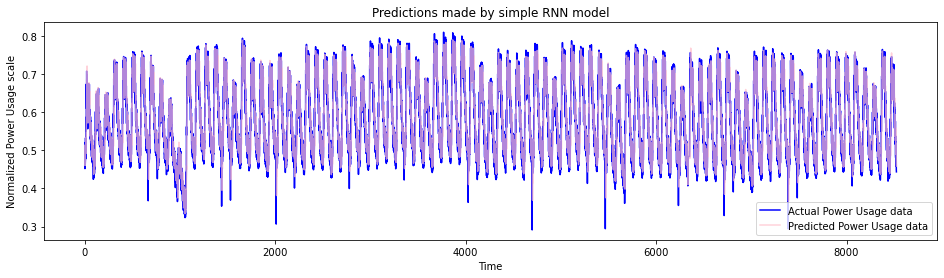

In [25]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual Power Usage data')
    plt.plot(predicted, alpha=0.7, color='pink',label='Predicted Power Usage data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Power Usage scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

In [26]:
print(rnn_predictions)

[[0.51107806]
 [0.47064918]
 [0.46784118]
 ...
 [0.46602938]
 [0.46511933]
 [0.45863387]]


In [27]:
min_val = 118078.6464
max_val = 322325.8172

normalized_predictions = rnn_predictions
original_predictions = normalized_predictions * (max_val - min_val) + min_val

In [28]:
print(original_predictions )

[[222464.9 ]
 [214207.4 ]
 [213633.88]
 ...
 [213263.83]
 [213077.95]
 [211753.31]]


# Next Using LSTM

In [29]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 20, 40)                │       6,720 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 20, 40)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 20, 40)                │      12,960 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_4 (Dropout)                │ (None, 20, 40)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 40)                    │      12,960 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ (None, 40)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1)                     │          41 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 32,681 (127.66 KB)

 Trainable params: 32,681 (127.66 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from keras.optimizers import Adam
learning_rate = 0.0001  # You can replace this with your desired learning rate

# ...

# Compile the model with the Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [31]:
lstm_model.compile(optimizer=optimizer,loss="MSE")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1000)##set epochs=10,batch_size=1000

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.1841
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 0.0089
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - loss: 0.0078
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 0.0071
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 0.0065
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - loss: 0.0063
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 0.0059
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - loss: 0.0057
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 0.0055
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 0.0053


In [32]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
R^2 Score of LSTM model =  0.5574021242593447


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
LSTM_MAE = mean_absolute_error(y_test, lstm_predictions)
LSTM_MSE = mean_squared_error(y_test, lstm_predictions)

print("MAE of LSTM model =", LSTM_MAE)
print("MSE of LSTM model =", LSTM_MSE)

MAE of LSTM model = 0.04840228405725646
MSE of LSTM model = 0.004036236706246573


In [34]:
mape = np.mean(np.abs((y_test - lstm_predictions) / y_test)) * 100
rmse = np.sqrt(np.mean((y_test - lstm_predictions)**2))

print("MAPE of LSTM model =", mape)
print("RMSE of LSTM model =", rmse)

MAPE of LSTM model = 18.435190585394636
RMSE of LSTM model = 0.1266865150910946


In [35]:
print('y_test.shape:', y_test.shape)
print('lstm_predictions.shape:', lstm_predictions.shape)

y_test.shape: (8524,)
lstm_predictions.shape: (8524, 1)


In [36]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))
lstm_predictions = np.reshape(lstm_predictions, (lstm_predictions.shape[0], 1))

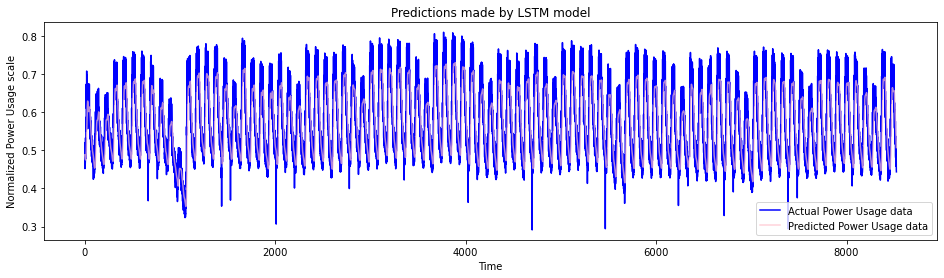

In [37]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")

# Compare predictions made by simple RNN, LSTM model

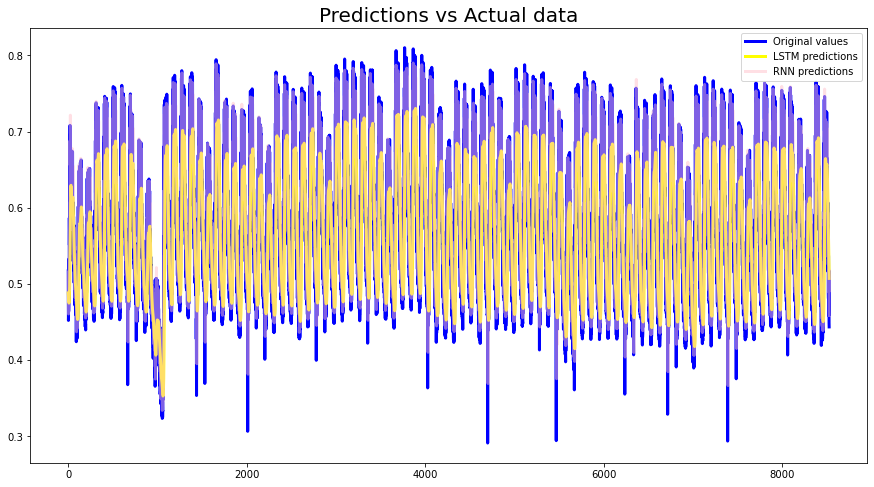

In [38]:
plt.figure(figsize=(15,8))

plt.plot(y_test, c="blue", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="yellow", linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.5, c="pink", linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs Actual data", fontsize=20)
plt.show()

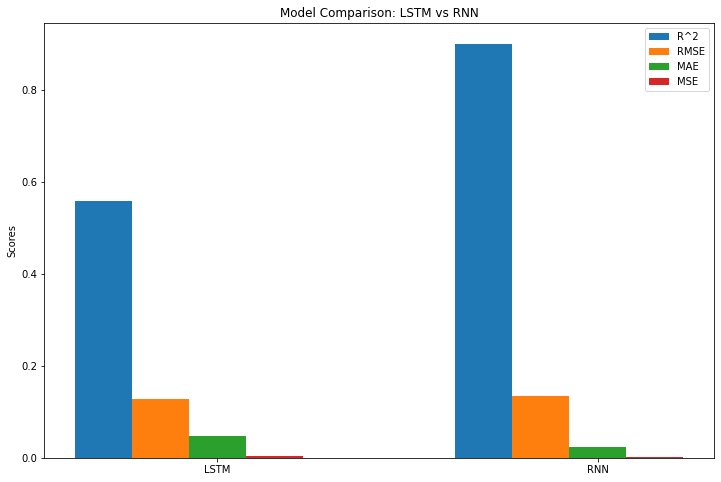

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['LSTM', 'RNN']

# Performance metrics
r2_scores = [0.5574021242593447, 0.8999598476522547]
rmse_scores = [0.1266865150910946, 0.13413591758982343]
mae_scores = [0.04840228405725646,0.023751791904322382 ]
mse_scores = [0.004036236706246573, 0.000912308343840925]
#mape_scores = [19.206892041456882, 18.904155246577446]
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.15

# Bar positions
bar_positions_r2 = np.arange(len(models))
bar_positions_rmse = bar_positions_r2 +  bar_width
bar_positions_mae = bar_positions_r2 + 2 * bar_width
bar_positions_mse = bar_positions_r2 + 3 * bar_width
#bar_positions_mape = bar_positions_r2 + bar_width
# Bar plots
plt.bar(bar_positions_r2, r2_scores, width=bar_width, label='R^2')
plt.bar(bar_positions_rmse, rmse_scores, width=bar_width, label='RMSE')
plt.bar(bar_positions_mae, mae_scores, width=bar_width, label='MAE')
plt.bar(bar_positions_mse, mse_scores, width=bar_width, label='MSE')
#plt.bar(bar_positions_mape, mape_scores, width=bar_width, label='MAPE')
# X-axis ticks and labels
ax.set_xticks(bar_positions_r2 + 2 * bar_width)
ax.set_xticklabels(models)

# Y-axis label
plt.ylabel('Scores')

# Title
plt.title('Model Comparison: LSTM vs RNN')

# Legend
plt.legend()

# Show the plot
plt.show()

# The Best model is RNN

In [40]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

class CustomKerasRegressor(BaseEstimator):
    def __init__(self, units=40, dropout_rate=0.15, learning_rate=0.001, epochs=10, batch_size=50, verbose=0):
        self.units = units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        model = self._build_model()
        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model_ = model
        return self

    def predict(self, X):
        return self.model_.predict(X)

    def _build_model(self):
        model = Sequential()
        model.add(SimpleRNN(self.units, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(self.dropout_rate))
        model.add(SimpleRNN(self.units, activation="tanh", return_sequences=True))
        model.add(Dropout(self.dropout_rate))
        model.add(SimpleRNN(self.units, activation="tanh", return_sequences=False))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1))
        
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss="mean_squared_error")
        return model

# Create CustomKerasRegressor for use in GridSearchCV
custom_rnn_regressor = CustomKerasRegressor()

# Define the parameter grid for grid search
param_grid = {
    'units': [40, 70, 120],
    'dropout_rate': [0.15],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10],
    'batch_size': [1000],
    'verbose': [0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=custom_rnn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding performance
print("Best Parameters: ", grid_result.best_params_)
print("Best Negative Mean Squared Error: ", grid_result.best_score_)

C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


C:\Users\86130\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Parameters:  {'batch_size': 1000, 'dropout_rate': 0.15, 'epochs': 10, 'learning_rate': 0.001, 'units': 70, 'verbose': 0}
Best Negative Mean Squared Error:  -0.0010991337987279655


In [41]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ simple_rnn_87 (SimpleRNN)          │ (None, 20, 70)                │       5,040 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_90 (Dropout)               │ (None, 20, 70)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ simple_rnn_88 (SimpleRNN)          │ (None, 20, 70)                │       9,870 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_91 (Dropout)               │ (None, 20, 70)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ simple_rnn_89 (SimpleRNN)          │ (None, 70)                    │       9,870 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_92 (Dropout)               │ (None, 70)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_30 (Dense)                   │ (None, 1)                     │          71 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 24,851 (97.07 KB)

 Trainable params: 24,851 (97.07 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
learning_rate = 0.001  # You can replace this with your desired learning rate

# ...

# Compile the model with the Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)
rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

In [43]:
rnn_model.compile(optimizer=optimizer,loss="mean_squared_error")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)#### set epochs=10, batch_size=1000

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - loss: 0.1430
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.0161
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0090
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0065
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0051
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0044
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0039
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0034
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0031
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0029


# Calculate R2 MAPE RMSE MAE MSE

In [44]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
R2 Score of RNN model =  0.9604335148763782


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
RNNmape = np.mean(np.abs((y_test - rnn_predictions) / y_test)) * 100
RNNrmse = np.sqrt(np.mean((y_test - rnn_predictions)**2))

print("MAPE of RNN model =", RNNmape)
print("RMSE of RNN model =", RNNrmse)

MAPE of RNN model = 2.555591490065406
RMSE of RNN model = 0.0189953538017733


In [46]:
RNN_MAE = mean_absolute_error(y_test, rnn_predictions)
print("MAE of RNN model =:", RNN_MAE)

# Calculate Mean Squared Error (MSE)
RNN_MSE = mean_squared_error(y_test, rnn_predictions)
print("MSE of RNN model=:", RNN_MSE)


MAE of RNN model =: 0.014248216399160862
MSE of RNN model=: 0.0003608234660545434


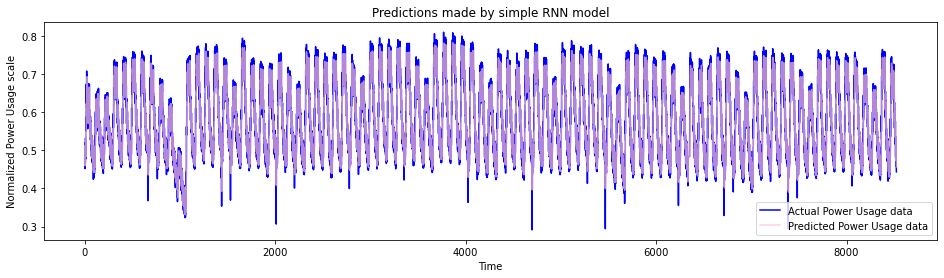

In [47]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual Power Usage data')
    plt.plot(predicted, alpha=0.7, color='pink',label='Predicted Power Usage data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Power Usage scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

In [48]:
# Make predictions for the future 10 days
predicted_data = []

# Use the last 'seq_len' days from the training data to start the prediction
X_test = X_train[-1:]

for i in range(960):
    # Predict the next day
    next_day_prediction = rnn_model.predict(X_test)
    
    # Append the prediction to the test set for the next prediction
    X_test = np.append(X_test[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)
    
    # Append the prediction to the results
    predicted_data.append(next_day_prediction[0, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [49]:
# Create a DataFrame for the predicted data with corresponding dates
predicted_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(minutes=15), periods=960, freq='15T')
predicted_df = pd.DataFrame({'datatime': predicted_dates, 'predicted_power_usage': predicted_data})
predicted_df.set_index('datatime', inplace=True)

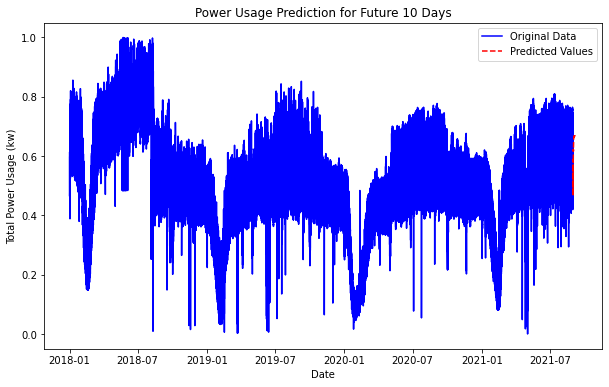

In [50]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(df['total power usage（kw）'], label='Original Data', color='blue')
plt.plot(predicted_df['predicted_power_usage'], label='Predicted Values', color='red', linestyle='dashed')
plt.title('Power Usage Prediction for Future 10 Days')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.legend()
plt.show()

In [51]:
predicted_start = pd.to_datetime('2021-09-01 00:00:00')
predicted_end = pd.to_datetime('2021-09-10 23:45:00')  

predicted_dates = pd.date_range(start=predicted_start, end=predicted_end, freq='15T')
predicted_df = pd.DataFrame({'predicted_power_usage': predicted_data}, index=predicted_dates)

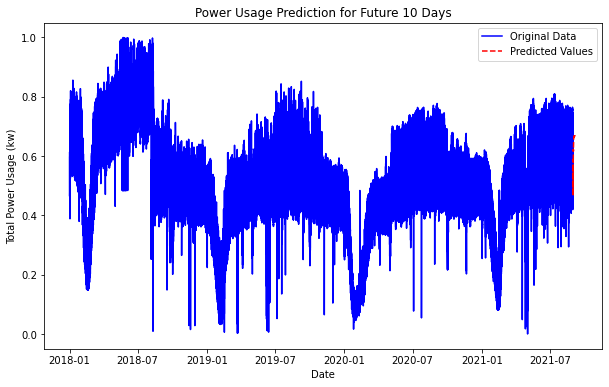

In [52]:
# Visualize the predictions along with historical data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total power usage（kw）'], label='Original Data', color='blue')
plt.plot(predicted_df.index, predicted_df['predicted_power_usage'], label='Predicted Values', color='red', linestyle='dashed')
plt.title('Power Usage Prediction for Future 10 Days')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')
plt.legend()
plt.show()

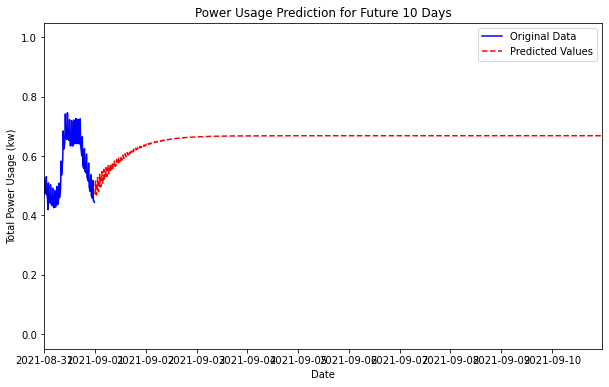

In [53]:
# Set the start date for visualization
start_date = pd.to_datetime('2021-08-31')

# Visualize the predictions along with historical data starting from January 2021
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total power usage（kw）'], label='Original Data', color='blue')
plt.plot(predicted_df.index, predicted_df['predicted_power_usage'], label='Predicted Values', color='red', linestyle='dashed')
plt.title('Power Usage Prediction for Future 10 Days')
plt.xlabel('Date')
plt.ylabel('Total Power Usage (kw)')

# Set x-axis limits
plt.xlim(start_date, predicted_end)

plt.legend()
plt.show()

In [45]:
print(predicted_df)

                     predicted_power_usage
2021-09-01 00:00:00               0.479274
2021-09-01 00:15:00               0.513023
2021-09-01 00:30:00               0.476245
2021-09-01 00:45:00               0.468860
2021-09-01 01:00:00               0.491139
...                                    ...
2021-09-10 22:45:00               0.736988
2021-09-10 23:00:00               0.736988
2021-09-10 23:15:00               0.736988
2021-09-10 23:30:00               0.736987
2021-09-10 23:45:00               0.736988

[960 rows x 1 columns]


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_future contains the predicted normalized data
normalized_data = predicted_df['predicted_power_usage'].values.reshape(-1, 1)

# Create a new MinMaxScaler and fit it on the original data
scaler = MinMaxScaler()
original_data = df['total power usage（kw）'].values.reshape(-1, 1)
scaler.fit(original_data)

# Inverse transform the normalized data
predicted_df['predicted_power_usage_original'] = scaler.inverse_transform(normalized_data)


In [47]:
print("Normalized Data:")
print(normalized_data)

Normalized Data:
[[0.4792742 ]
 [0.51302344]
 [0.4762447 ]
 [0.46886015]
 [0.49113894]
 [0.522277  ]
 [0.49427485]
 [0.48565614]
 [0.49529696]
 [0.5307062 ]
 [0.5183893 ]
 [0.50558066]
 [0.51440084]
 [0.5531189 ]
 [0.53481555]
 [0.51706576]
 [0.53143436]
 [0.564133  ]
 [0.54999167]
 [0.53839296]
 [0.54950494]
 [0.5756451 ]
 [0.564546  ]
 [0.5568011 ]
 [0.5665202 ]
 [0.587968  ]
 [0.5813861 ]
 [0.5740298 ]
 [0.5781065 ]
 [0.59810215]
 [0.5959757 ]
 [0.58828366]
 [0.5916129 ]
 [0.6110537 ]
 [0.60887676]
 [0.6009329 ]
 [0.6045648 ]
 [0.6219383 ]
 [0.6203254 ]
 [0.6137167 ]
 [0.61703825]
 [0.63140404]
 [0.6302852 ]
 [0.6256995 ]
 [0.6286065 ]
 [0.64059716]
 [0.640856  ]
 [0.6371704 ]
 [0.63859946]
 [0.6490643 ]
 [0.6504119 ]
 [0.6471181 ]
 [0.6480251 ]
 [0.6574868 ]
 [0.65904164]
 [0.6559908 ]
 [0.65685326]
 [0.6653289 ]
 [0.66688997]
 [0.6643451 ]
 [0.6651821 ]
 [0.6723086 ]
 [0.6737737 ]
 [0.6719365 ]
 [0.6726703 ]
 [0.67865217]
 [0.6802927 ]
 [0.67894244]
 [0.679357  ]
 [0.6844654 ]
 [0

In [48]:
print("Original Data:")
print(original_data)

Original Data:
[[0.61152661]
 [0.56983697]
 [0.5660231 ]
 ...
 [0.44967381]
 [0.44876391]
 [0.44367102]]


In [49]:
print(predicted_df)

                     predicted_power_usage  predicted_power_usage_original
2021-09-01 00:00:00               0.479274                        0.479274
2021-09-01 00:15:00               0.513023                        0.513023
2021-09-01 00:30:00               0.476245                        0.476245
2021-09-01 00:45:00               0.468860                        0.468860
2021-09-01 01:00:00               0.491139                        0.491139
...                                    ...                             ...
2021-09-10 22:45:00               0.736988                        0.736988
2021-09-10 23:00:00               0.736988                        0.736988
2021-09-10 23:15:00               0.736988                        0.736988
2021-09-10 23:30:00               0.736987                        0.736987
2021-09-10 23:45:00               0.736988                        0.736988

[960 rows x 2 columns]


In [50]:
#max_value = df['total power usage（kw）'].max()
#min_value = df['total power usage（kw）'].min()

#print("Maximum Value:", max_value)
#print("Minimum Value:", min_value)

In [51]:
min_val = 118078.6464
max_val = 322325.8172

normalized_predictions = predicted_df
original_predictions = normalized_predictions * (max_val - min_val) + min_val

In [52]:
print(original_predictions)

                     predicted_power_usage  predicted_power_usage_original
2021-09-01 00:00:00          215969.062500                   215969.062500
2021-09-01 00:15:00          222862.234375                   222862.234375
2021-09-01 00:30:00          215350.281250                   215350.281250
2021-09-01 00:45:00          213842.000000                   213842.000000
2021-09-01 01:00:00          218392.390625                   218392.390625
...                                    ...                             ...
2021-09-10 22:45:00          268606.343750                   268606.343750
2021-09-10 23:00:00          268606.312500                   268606.312500
2021-09-10 23:15:00          268606.312500                   268606.312500
2021-09-10 23:30:00          268606.250000                   268606.250000
2021-09-10 23:45:00          268606.312500                   268606.312500

[960 rows x 2 columns]


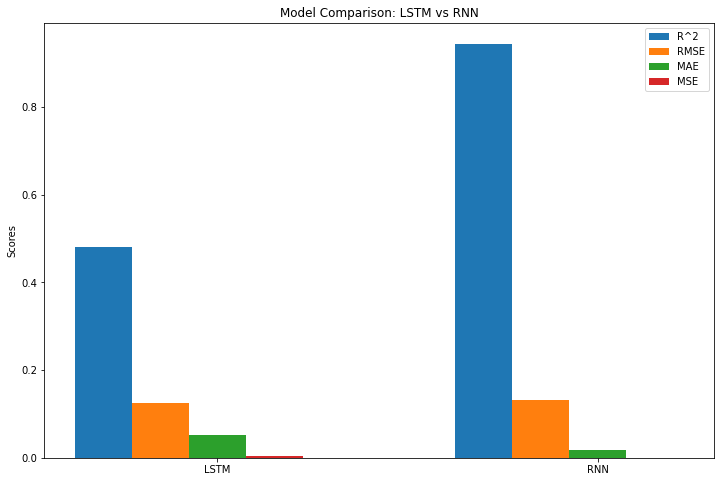

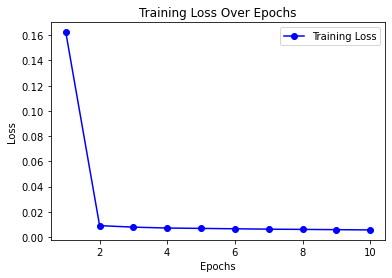

In [56]:
loss_values = [0.1624, 0.0090, 0.0078, 0.0071, 0.0068, 0.0065, 0.0062, 0.0060, 0.0058, 0.0056]

# Plotting the loss values
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

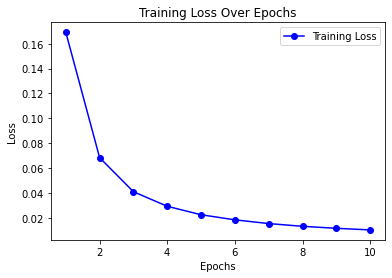

In [57]:
loss_values = [0.1692, 0.0684, 0.0410, 0.0293, 0.0225, 0.0184, 0.0154, 0.0132, 0.0116, 0.0103]

# Plotting the loss values
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()